<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson02_jupyter/lecture_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# google colabへのリンク

# 使用しているversionについて

In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic'

In [3]:
# pythonのバージョン確認
!python -V

Python 3.7.14


In [4]:
# 一般的にpandasはpdと名前を付けてimportされる
import pandas as pd

In [5]:
# panasのversion
pd.__version__

'1.3.5'

## Pandasについて
- 公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/
- pandasは、Pythonにおいて、データ解析を支援する機能を提供するライブラリである。
- 特に、数表および時系列データを操作するためのデータ構造と演算を提供する。

## 参考リンク（もうちょっといろいろ知りたい人用）

**全般的に**
- [データ分析で頻出のPandas基本操作 - qiita](https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a)
    - 基本操作についてまとめてくれている。

**基本操作系**
- [Pandas Cheet Sheet - GitHub](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
    - 基本操作について1ページでまとめてくれているCheet Sheet
    
- [StatsFragments by @sinhrks](http://sinhrks.hatenablog.com/)
    - 各種Pandasメソッドを図付きで詳細に解説してくれています。非常に参考になる。
    

**集計テクニック系**
- [pandasで条件分岐(case when的な)によるデータ加工を網羅したい](https://qiita.com/Hyperion13fleet/items/98c31744e66ac1fc1e9f)
    - SQLのcase whenのような条件分岐の処理をpandasでやりたいときが良くありますがなかなか難しい。そんなときのお助け記事。
    
**作図系**
- [PythonでPandasのPlot機能を使えばデータ加工からグラフ作成までマジでシームレス - Qiita](https://qiita.com/hik0107/items/de5785f680096df93efa)
    - Pandas Plotでできることの概要がわかります
- [pythonで美しいグラフ描画 -seabornを使えばデータ分析と可視化が捗る その1 - Qiita](https://qiita.com/hik0107/items/3dc541158fceb3156ee0)
    - Pandas Plot, matplotlibと比較して簡単に美しいプロットがかけるmatplotのラッパーseabornの概要がわかります 

# 目次

### 1. データの読み込み
### 2. データや統計量の表示
### 3. データの欠損状態の確認
### 4. データの並び替え
### 5. データの追加
### 6. データの表示
### 7. データの出力

# 1. データの読み込み

元のデータ

http://phenol-explorer.eu/downloads

Structures for Polyphenols having composition data (SMILES)をダウンロード
して少しデータを追加したもの。

In [ ]:
!wget https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson02_jupyter/data/compounds-structures.csv

In [6]:
df = pd.read_csv('compounds-structures.csv', sep=',')

# 2. データや統計量の表示

In [7]:
df.head(1) 

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.58,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC


In [ ]:
df.tail(1)

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
491,730,COC1=CC(=CC=C1O)C(=O)C(O)CO,Other polyphenols,Hydroxybenzoketones,"2,3-Dihydroxy-1-guaiacylpropanone",212.199,C10H12O5,NaN,2004-05-06 16:14:14 UTC,2015-05-10 23:29:00 UTC,-0.0633,0.608331,212.068473,1,1,0,0


In [ ]:
df.sample()

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
418,633,CCC1=CC(OC)=C(O)C=C1,Other polyphenols,Alkylmethoxyphenols,4-Ethylguaiacol,152.19,C9H12O2,2785-89-9,2007-02-21 00:00:00 UTC,2015-05-10 23:28:57 UTC,1.9632,0.701552,152.08373,1,1,0,0


## 3. 簡単にデータの状態を確認


In [9]:
df.shape

(492, 10)

In [8]:
df.columns

Index(['id', 'smiles', 'compound_class', 'compound_subclass', 'name',
       'molecular_weight', 'formula', 'cas_number', 'created_at',
       'updated_at'],
      dtype='object')

In [ ]:
df.describe()

,id,molecular_weight,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,376.518293,439.122771,1.026019,0.359583,439.823104,2.829268,0.632114,0.032520,0.0
std,211.994048,226.451341,2.510341,0.232284,227.173667,2.921114,1.077839,0.218678,0.0
min,3.000000,94.111200,-5.298300,0.016294,94.041865,0.000000,0.000000,0.000000,0.0
25%,220.750000,302.225250,-0.519700,0.155655,302.033556,1.000000,0.000000,0.000000,0.0
50%,381.500000,431.038000,1.046350,0.290155,431.602009,2.000000,0.000000,0.000000,0.0
75%,569.750000,578.519250,2.520775,0.574867,578.142426,4.000000,1.000000,0.000000,0.0
max,730.000000,2805.900000,10.713100,0.887434,2804.229343,43.000000,7.000000,3.000000,0.0


In [10]:
df.describe(include='all')

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
count,492.000000,492,492,492,492,492.000000,492,193,492,492
unique,NaN,489,5,29,492,NaN,311,190,268,40
top,NaN,[H][C@@]1(O)CO[C@]([H])(OC2=CC3=C(O)C=C(O)C=C3...,Flavonoids,Flavonols,Malvidin 3-O-(6''-p-coumaroyl-glucoside),NaN,C7H6O4,607-80-7,2007-10-17 00:00:00 UTC,2015-05-10 23:28:47 UTC
freq,NaN,2,268,78,1,NaN,7,2,17,33
mean,376.518293,NaN,NaN,NaN,NaN,439.122771,NaN,NaN,NaN,NaN
std,211.994048,NaN,NaN,NaN,NaN,226.451341,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,94.111200,NaN,NaN,NaN,NaN
25%,220.750000,NaN,NaN,NaN,NaN,302.225250,NaN,NaN,NaN,NaN
50%,381.500000,NaN,NaN,NaN,NaN,431.038000,NaN,NaN,NaN,NaN
75%,569.750000,NaN,NaN,NaN,NaN,578.519250,NaN,NaN,NaN,NaN


## 4. データの処理

In [ ]:
# 自作した関数を入れる。
def over0(num):
    if num >=0:
        return 1
    else:
        return 0
    
df2["MolLogP_over1"] = df2["MolLogP"].map(over0)

# 5. データの欠損状態の確認

In [12]:
df.isnull()

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
487,False,False,False,False,False,False,False,False,False,False
488,False,False,False,False,False,False,False,True,False,False
489,False,False,False,False,False,False,False,False,False,False
490,False,False,False,False,False,False,False,True,False,False


In [13]:
df.isnull().any()

id                   False
smiles               False
compound_class       False
compound_subclass    False
name                 False
molecular_weight     False
formula              False
cas_number            True
created_at           False
updated_at           False
dtype: bool

In [14]:
# 欠損値を確認する。
df.isnull().sum()

id                     0
smiles                 0
compound_class         0
compound_subclass      0
name                   0
molecular_weight       0
formula                0
cas_number           299
created_at             0
updated_at             0
dtype: int64

## 6. 値（欠損）の置き換えや削除

In [ ]:
# 欠損値を置き換え
df.fillna(value={'cas_number': 0}).shape

(492, 17)

In [ ]:
# '欠損値のある行を削除
df.dropna(subset=['cas_number'], axis=0).shape

(193, 17)

In [ ]:
#欠損値のある列（ここでは、cas_number）を、１列指定して削除
df.drop('cas_number', axis=1).shape

(492, 16)

# 7. Pandasで新しいdfの作成

In [ ]:
df.columns

Index(['id', 'smiles', 'compound_class', 'compound_subclass', 'name',
       'molecular_weight', 'formula', 'cas_number', 'created_at', 'updated_at',
       'MolLogP', 'qed', 'ExactMolWt', 'fr_phenol', 'fr_methoxy', 'fr_lactone',
       'fr_urea'],
      dtype='object')

In [ ]:
# 任意の列だけ取り出す。
df[['smiles', 'formula']].head(3)

,smiles,formula
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,C32H31O14
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,C23H23O13
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,C23H23O12


In [ ]:
# 上書きする。
df2 = df[['smiles', 'formula']].head(3)

In [ ]:
df2

,smiles,formula
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,C32H31O14
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,C23H23O13
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,C23H23O12


## 8. 集計と重複削除

In [18]:
df['smiles'].value_counts()

[H][C@@]1(O)CO[C@]([H])(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C(OC)=C2)[C@]([H])(O)[C@]1([H])O    2
[H][C@]12CO[C@H](C3=CC4=C(OCO4)C=C3)[C@@]1([H])CO[C@@H]2C1=CC2=C(OCO2)C=C1                            2
O[C@@H]1C[C@](O)(C(O)=O)C[C@@H](O)[C@H]1OC(=O)\C=C\C1=CC=C(O)C=C1                                     2
COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(=O)\C=C\C3=CC=C(O)C=C3)C(O)C(O)C1O)C(O)=CC(O)=C2        1
[H][C@@]1(O)C[C@](O)(C[C@@]([H])(OC(=O)\C=C\C2=CC(OC)=C(O)C(OC)=C2)[C@]1([H])O)C(O)=O                 1
                                                                                                     ..
COC1=CC=C(C=C1)C1=CC(=O)C2=C(O1)C(OC)=C(OC)C(O)=C2O                                                   1
COC1=C(OC)C=C(C=C1)C1=CC(=O)C2=C(O1)C(OC)=C(OC)C(O)=C2O                                               1
COC1=C(OC)C(O)=C2C(=O)C=C(OC2=C1)C1=CC=C(O)C=C1                                                       1
COC1=C(O)C2=C(OC(=CC2=O)C2=CC=C(O)C=C2)C=C1O                    

In [22]:
df.duplicated(subset='smiles')

0      False
1      False
2      False
3      False
4      False
       ...  
487    False
488    False
489    False
490    False
491    False
Length: 492, dtype: bool

In [21]:
df['smiles'].unique().tolist()

['COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(=O)\\C=C\\C3=CC=C(O)C=C3)C(O)C(O)C1O)C(O)=CC(O)=C2',
 'CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C(O)=C2)C(O)C(O)C1O',
 '[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC=C(O)C(O)=C2)[C@]([H])(O)[C@@]([H])(O)[C@@]1([H])O',
 'OC[C@H]1O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C=C2)[C@H](O)[C@@H](O)[C@H]1O',
 'OC[C@H]1O[C@@H](OC2=CC3=C(C=C(O)C=C3O)[O+]=C2C2=CC(O)=C(O)C=C2)[C@H](O)[C@@H](O)[C@@H]1O',
 'C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=CC4=C(O)C=C(O)C=C4[O+]=C3C3=CC(O)=C(O)C=C3)[C@H](O)[C@@H](O)[C@@H]2O)[C@H](O)[C@H](O)[C@H]1O',
 'OC[C@H]1O[C@@H](O[C@H]2[C@H](OC3=CC4=C(O)C=C(O)C=C4[O+]=C3C3=CC(O)=C(O)C=C3)O[C@H](CO)[C@@H](O)[C@@H]2O)[C@H](O)[C@@H](O)[C@@H]1O',
 'OC[C@@H]1O[C@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC=C(O)C=C2)[C@@H](O)[C@H](O)[C@H]1O',
 'O[C@@H]1[C@@H](COC(=O)CC(O)=O)O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C=C2)[C@H](O)[C@H]1O',
 'COC1=C(O)C=CC(=C1)C1=[O+]C2=CC(O)=CC(O)=C2C=C1O',
 'C

# 9. 変数の前処理

In [ ]:
#Pandasを使ってワンホットエンコーディング
df2 = pd.get_dummies(df, columns=['compound_class'])

In [ ]:
df2.columns

Index(['id', 'smiles', 'compound_subclass', 'name', 'molecular_weight',
       'formula', 'cas_number', 'created_at', 'updated_at', 'MolLogP', 'qed',
       'ExactMolWt', 'fr_phenol', 'fr_methoxy', 'fr_lactone', 'fr_urea',
       'compound_class_Flavonoids', 'compound_class_Lignans',
       'compound_class_Other polyphenols', 'compound_class_Phenolic acids',
       'compound_class_Stilbenes'],
      dtype='object')

In [ ]:
df2.shape

(492, 21)

In [ ]:
df2.describe()

,id,molecular_weight,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea,compound_class_Flavonoids,compound_class_Lignans,compound_class_Other polyphenols,compound_class_Phenolic acids,compound_class_Stilbenes,MolLogP_over1
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,376.518293,439.122771,1.026019,0.359583,439.823104,2.829268,0.632114,0.032520,0.0,0.544715,0.058943,0.158537,0.217480,0.020325,0.666667
std,211.994048,226.451341,2.510341,0.232284,227.173667,2.921114,1.077839,0.218678,0.0,0.498503,0.235758,0.365615,0.412951,0.141254,0.471884
min,3.000000,94.111200,-5.298300,0.016294,94.041865,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220.750000,302.225250,-0.519700,0.155655,302.033556,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,381.500000,431.038000,1.046350,0.290155,431.602009,2.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,569.750000,578.519250,2.520775,0.574867,578.142426,4.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,730.000000,2805.900000,10.713100,0.887434,2804.229343,43.000000,7.000000,3.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2["molecular_weight_int"] = df2["molecular_weight"].map(int)
df2.shape

(492, 23)

In [ ]:
# 作ったものを削除
df2.drop('molecular_weight_int', axis=1).shape

(492, 22)

# 10. 可視化


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05ce09b310>]],
      dtype=object)

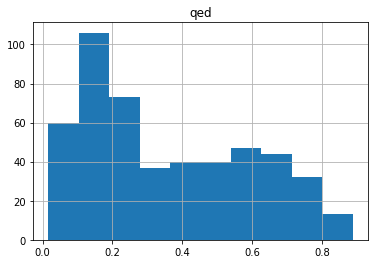

In [ ]:
df.hist('qed')

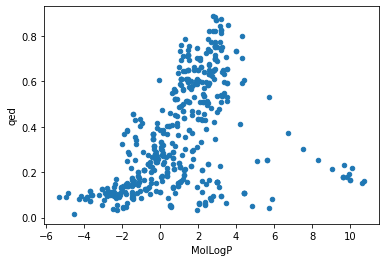

In [ ]:
df.plot(kind='scatter', x='MolLogP', y='qed')

# 7. データの出力

In [ ]:
df.to_csv('output2.csv', index=False)

# 以上です